## Searching for specific terms project

In [28]:
import pytesseract
from pytesseract import Output
import numpy as np
import cv2
import os
import re
import matplotlib.pyplot as plt 
from PIL import ImageFont, ImageDraw, Image

In [29]:
directory_imgs = "./receipts/"
paths = [os.path.join(directory_imgs, f) for f in os.listdir(directory_imgs)]
paths.remove('./receipts/.DS_Store')
print(paths)

['./receipts/ee5bc933-1580-43f9-b023-b02efafa132a.JPG', './receipts/e7ac1fcf-3820-4181-aba5-7a5702320a11.JPG', './receipts/f8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.JPG', './receipts/bcc95619-d751-4098-b1d3-4e22ef6e1531.JPG']


In [30]:
def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

./receipts/ee5bc933-1580-43f9-b023-b02efafa132a.JPG


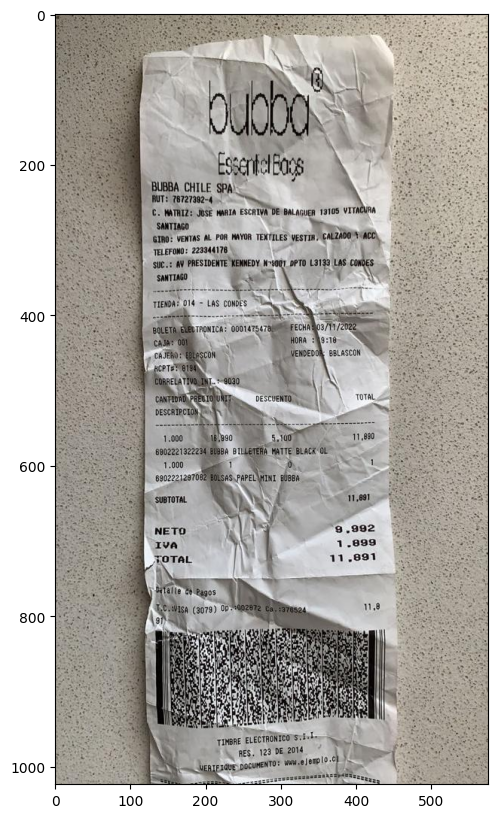

./receipts/e7ac1fcf-3820-4181-aba5-7a5702320a11.JPG


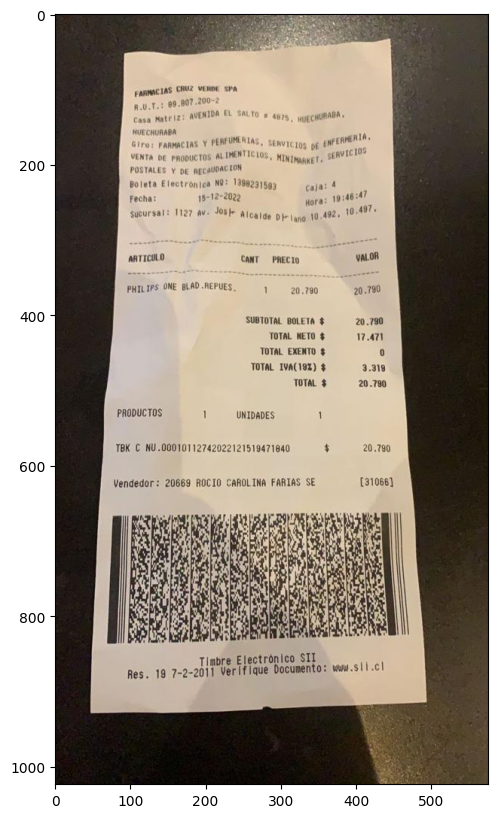

./receipts/f8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.JPG


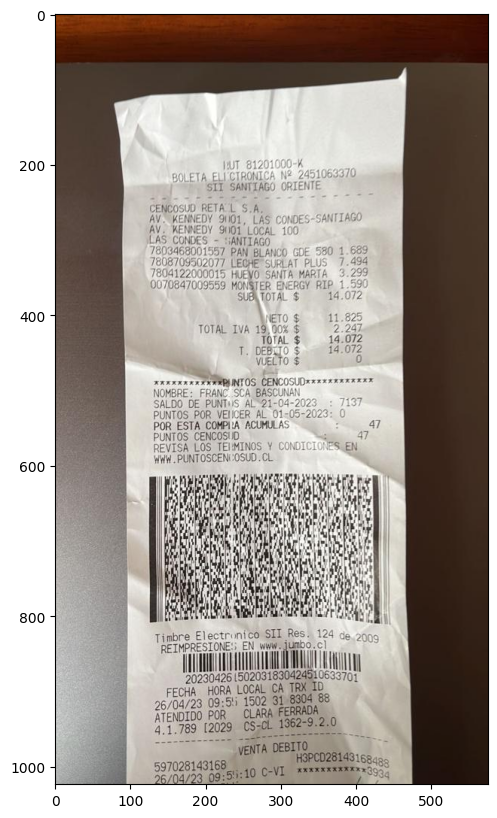

./receipts/bcc95619-d751-4098-b1d3-4e22ef6e1531.JPG


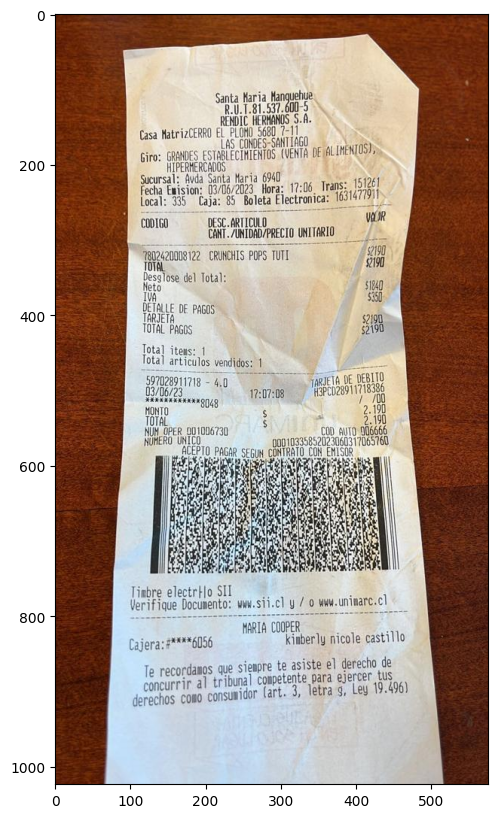

In [31]:
for image in paths:
  print(image)
  image = cv2.imread(image) 
  show_img(image)

## Tesseract settings

In [32]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = '/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata'
custom_config = r'--tessdata-dir "/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata"'

def tesseract_ocr(img):
    text = pytesseract.image_to_string(img, lang='spa', config=custom_config)
    return text

## Text recognition

In [33]:
full_text = ''
txt_file = 'results_ocr.txt'

for image in paths:
  img = cv2.imread(image)
  file_image = os.path.split(image)[-1]
  file_image_separate = '================\n' + str(file_image)
  full_text = full_text + file_image_separate + '\n'
  text = tesseract_ocr(img)
  full_text = full_text + text

In [34]:
full_text

'================\nee5bc933-1580-43f9-b023-b02efafa132a.JPG\nti\n\nEA ETA sn.\n\ny 1 de MARIA ESCRIVÁ DE: BALAGUER 13105 VIT\n\nMO: vENTAS AL POR VOR TEXMILES estan CALZADO AC,\n\n1.801\n\n9.992\n1.899\n11,691\n\ncuen ELECTION CO Sib\nLo RES, 123 DE2O1A\n\n================\ne7ac1fcf-3820-4181-aba5-7a5702320a11.JPG\nFARMACIAS. CRUZ VENDE SpA\n\nFecha\n\nsucursal\nARTICULO CANT PRECIO\n\nPHILIPS ONE BLAD.REPUE\n\nSUBIOTAL BOLETA $\nTOTAL METO $\n\nTOTAL EXENTO $\n\nTOTAL IYACI9Z) 4\n\nTOTAL $\n\nPRODUCTOS UNIDADES\n\nTBK C NU.00010112742022121519471840\n\nVendedor: 20669 ROCIO CAROLINA FARIAS SE\n\nTimbre Electrónico SIT\n\n1310661\n\nRes. 19 7-2-2011 Verifique Documento: ww.sl!.cl\n\n================\nf8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.JPG\n597028143168,\n3604/93 09: 0010 OVAS\n================\nbcc95619-d751-4098-b1d3-4e22ef6e1531.JPG\na Haría cis\nR.4.1.81.537.600-5\npil JERUNOS Soño\nCasa MatrizCERRO El el 0n0 5680 7-11\n\nNT\nDES ES ¡pecas (ENTA DEJALIMENTOS)\n\nAvda Santa Maria 6

## Saving the results

In [35]:
file_txt = open(txt_file, 'w+')
file_txt.write(full_text + '\n')
file_txt.close()

## Searching in the .txt file

In [36]:
term_search = 'TOTAL'

with open('./results_ocr.txt', 'r') as f:
    results = [i.start() for i in re.finditer(term_search, f.read())]
    
results

[402, 416, 432, 450, 1192, 1324]

## Searching in the images

In [37]:
for image in paths:
  #print(image)
  img = cv2.imread(image)
  file_img = os.path.split(image)[-1]
  print('==================\n' + str(file_img))
  text = tesseract_ocr(img)
  results = [i.start() for i in re.finditer(term_search, text)]
  print('Number of times the term {} appears: {}'.format(term_search, len(results)))
  print('\n')

ee5bc933-1580-43f9-b023-b02efafa132a.JPG
Number of times the term TOTAL appears: 0


e7ac1fcf-3820-4181-aba5-7a5702320a11.JPG
Number of times the term TOTAL appears: 4


f8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.JPG
Number of times the term TOTAL appears: 0


bcc95619-d751-4098-b1d3-4e22ef6e1531.JPG
Number of times the term TOTAL appears: 2




## Word cloud

In [38]:
import spacy

!python -m spacy download es

2023-08-10 16:21:17.329852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 11.2 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [39]:
nlp = spacy.load('es_core_news_sm')

In [40]:
stop_words = spacy.lang.es.stop_words.STOP_WORDS
print(stop_words)
print(len(stop_words))

{'poder', 'fuimos', 'mediante', 'realizado', 'expresó', 'adelante', 'deben', 'fin', 'habia', 'pudo', 'haya', 'tu', 'aquélla', 'era', 'qué', 'solamente', 'segunda', 'primera', 'saben', 'dan', 'podeis', 'una', 'sigue', 'a', 'cuánto', 'podrá', 'otra', 'proximo', 'da', 'hacemos', 'un', 'ahi', 'estado', 'cinco', 'otros', 'debe', 'dentro', 'éste', 'supuesto', 'tenga', 'queremos', 'hacen', 'tan', 'cuándo', 'todavía', 'verdadero', 'tienen', 'mientras', 'teneis', 'dias', 'míos', 'últimas', 'tengo', 'entre', 'los', 'cuál', 'tanto', 'ahora', 'aquella', 'son', 'dia', 'verdad', 'allí', 'total', 'cuenta', 'incluso', 'pues', 'haber', 'decir', 'sobre', 'cómo', 'día', 'partir', 'considera', 'mucho', 'quizás', 'despacio', 'había', 'aquel', 'suyo', 'éstos', 'varios', 'buen', 'nuestras', 'existen', 'bien', 'entonces', 'casi', 'indicó', 'tercera', 'saber', 'esta', 'claro', 'cuántas', 'uso', 'ninguno', 'tendrá', 'hay', 'realizó', 'ellos', 'del', 'ése', 'así', 'puede', 'atras', 'ante', 'salvo', 'tampoco', 'e

In [51]:
def preprocessing(text):
    text = text.lower()
    document = nlp(text)
    tokens_list = []
    
    for token in document:
        tokens_list.append(token.text)
        
    tokens = [word for word in tokens_list if word not in stop_words]
    tokens = ' '.join([str(element) for element in tokens])
    return tokens

In [52]:
processed_full_text = preprocessing(full_text)
print(processed_full_text)

= = = = = = = = = = = = = = = = 
 ee5bc933-1580-43f9-b023-b02efafa132a.jpg 
 

 ea eta sn . 

 1 maria escrivá : balaguer 13105 vit 

 mo : ventas vor texmiles calzado ac , 

 1.801 

 9.992 
 1.899 
 11,691 

 cuen election co sib 
 res , 123 de2o1a 

 = = = = = = = = = = = = = = = = 
 e7ac1fcf-3820-4181-aba5-7a5702320a11.jpg 
 farmacias . cruz vende spa 

 fecha 

 sucursal 
 articulo cant precio 

 philips one blad.repue 

 subiotal boleta $ 
 meto $ 

 exento $ 

 iyaci9z ) 4 

 $ 

 productos unidades 

 tbk c nu.00010112742022121519471840 

 vendedor : 20669 rocio carolina farias 

 timbre electrónico sit 

 1310661 

 res . 19 7-2-2011 verifique documento : ww.sl!.cl 

 = = = = = = = = = = = = = = = = 
 f8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.jpg 
 597028143168 , 
 3604/93 09 : 0010 ovas 
 = = = = = = = = = = = = = = = = 
 bcc95619-d751-4098-b1d3-4e22ef6e1531.jpg 
 haría cis 
 r.4.1.81.537.600-5 
 pil jerunos soño 
 casa matrizcerro 0n0 5680 7-11 

 nt 
 des ¡ pecas ( enta dejalime

In [53]:
len(full_text), len(processed_full_text)

(1394, 1501)

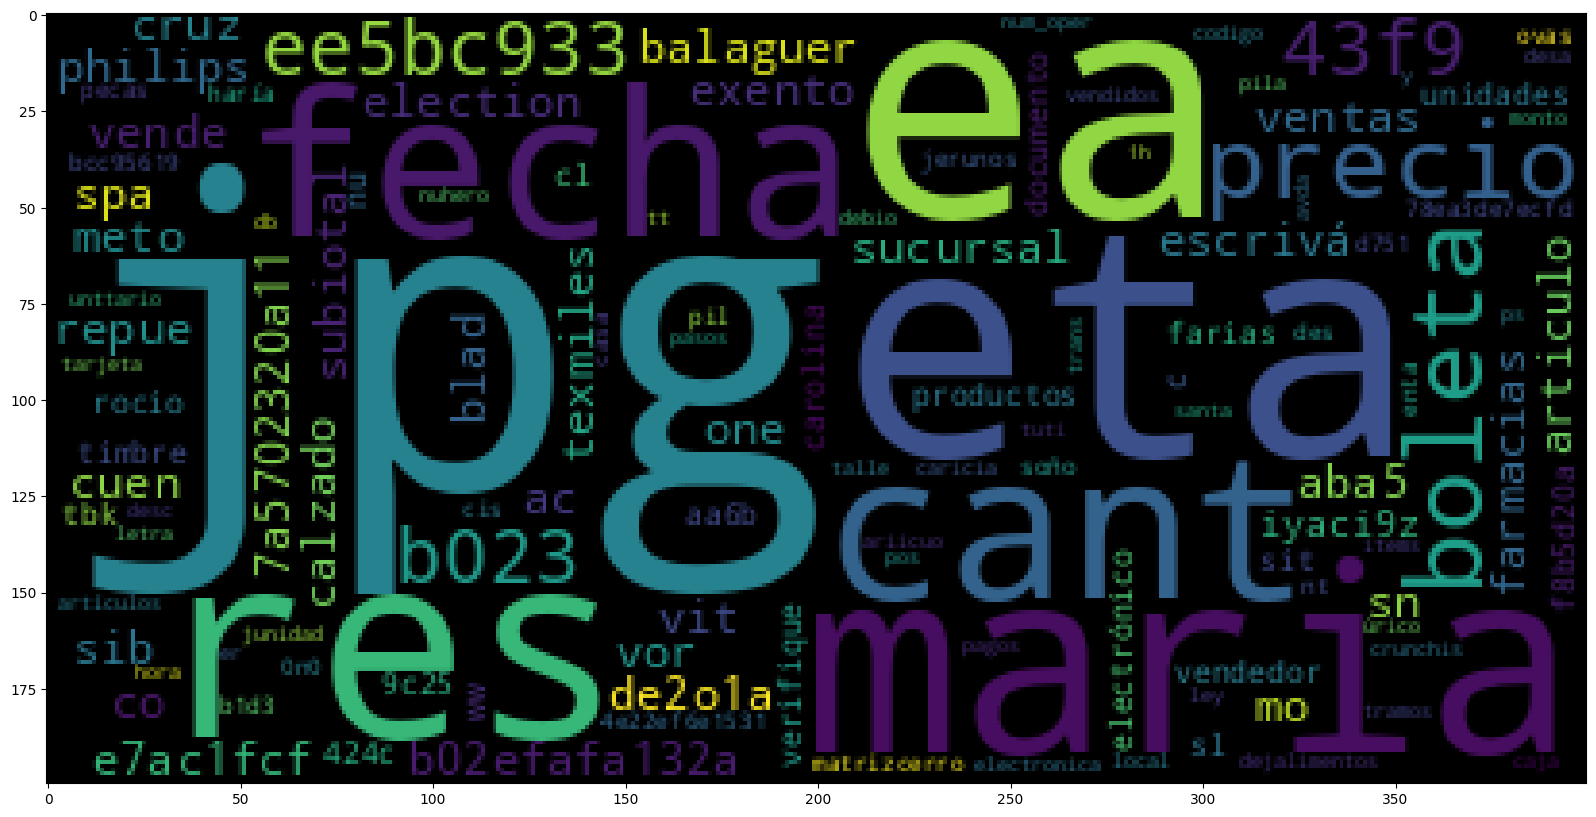

In [54]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud().generate(processed_full_text))

## Named entity recognition

In [55]:
document = nlp(processed_full_text)

In [56]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [59]:
for entity in document.ents:
  if entity.label_ == 'LOC':
    print(entity.text, entity.label_)

santa maria 6940 LOC


## Text recognition in the images

In [60]:
font = './MerchantCopy.ttf'

def write_text(text, x, y, img, font, color=(50, 50, 255), font_size=16):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img) 
  draw = ImageDraw.Draw(img_pil) 
  draw.text((x, y-font_size), text, font = font, fill = color) 
  img = np.array(img_pil) 

  return img

In [61]:
min_conf = 30
def box(i, result, img, color=(255, 100, 0)):
  x = result["left"][i]
  y = result["top"][i]
  w = result["width"][i]
  h = result["height"][i]
    
  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

In [65]:
def ocr_process_image(img, term_search, min_conf):
  result = pytesseract.image_to_data(img, lang='por', output_type=Output.DICT)
  number_of_times = 0
  for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_conf:
      text = result['text'][i]
      if term_search.lower() in text.lower():
        x, y, img = box(i, result, img, (0,0,255))
        img = write_text(text, x, y, img, font, (50,50,225), 14)
        number_of_times += 1
  return img, number_of_times

ee5bc933-1580-43f9-b023-b02efafa132a.JPG
Number of times term TOTAL appears in ee5bc933-1580-43f9-b023-b02efafa132a.JPG: 0




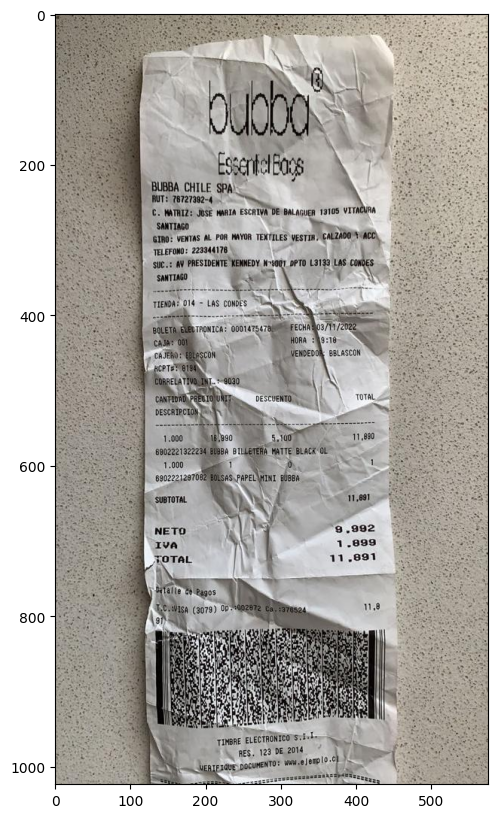

e7ac1fcf-3820-4181-aba5-7a5702320a11.JPG
Number of times term TOTAL appears in e7ac1fcf-3820-4181-aba5-7a5702320a11.JPG: 5




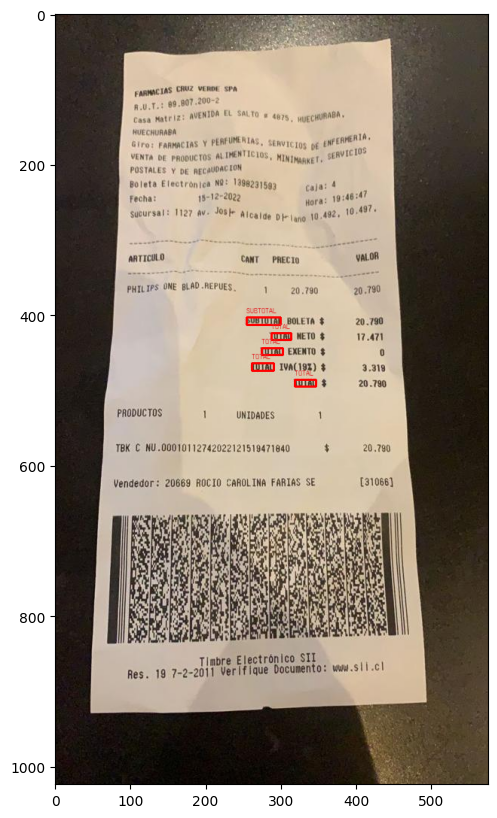

f8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.JPG
Number of times term TOTAL appears in f8b5d20a-aa6b-424c-9c25-78ea3de7ecfd.JPG: 0




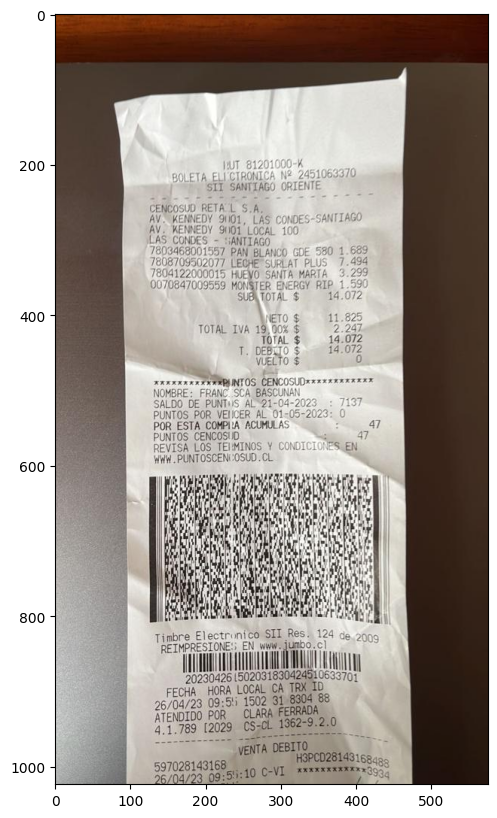

bcc95619-d751-4098-b1d3-4e22ef6e1531.JPG
Number of times term TOTAL appears in bcc95619-d751-4098-b1d3-4e22ef6e1531.JPG: 5




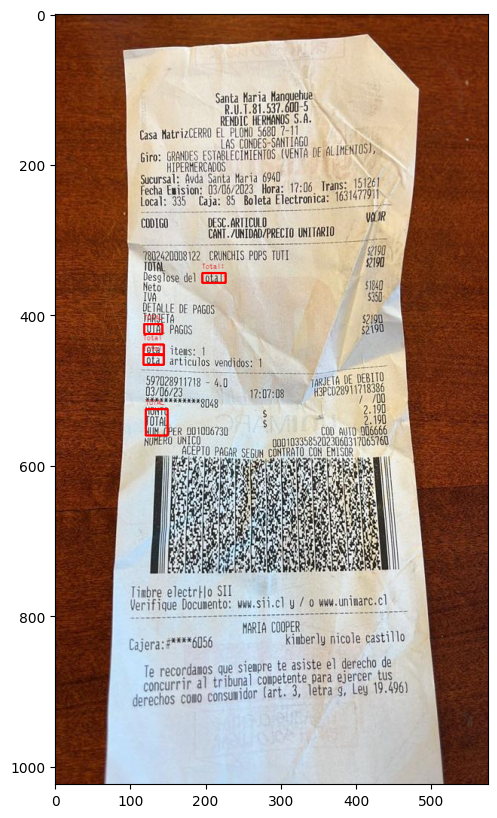

In [66]:
term_search = 'TOTAL'
for image in paths:
  #print(image)
  img = cv2.imread(image)
  img_original = img.copy()
  file_image = os.path.split(image)[-1]
  print('=================\n' + str(file_image))

  img, number_of_times = ocr_process_image(img, term_search, min_conf)
  print('Number of times term {} appears in {}: {}'.format(term_search, file_image, number_of_times))
  print('\n')
  show_img(img)

## Saving the results 

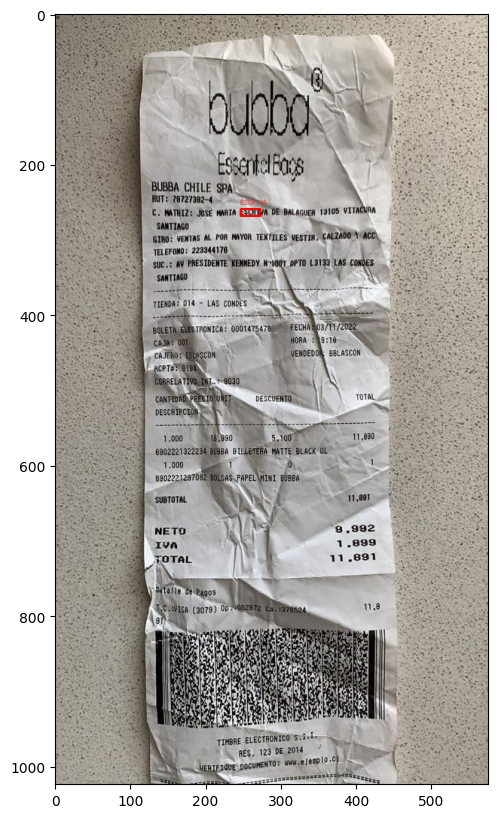

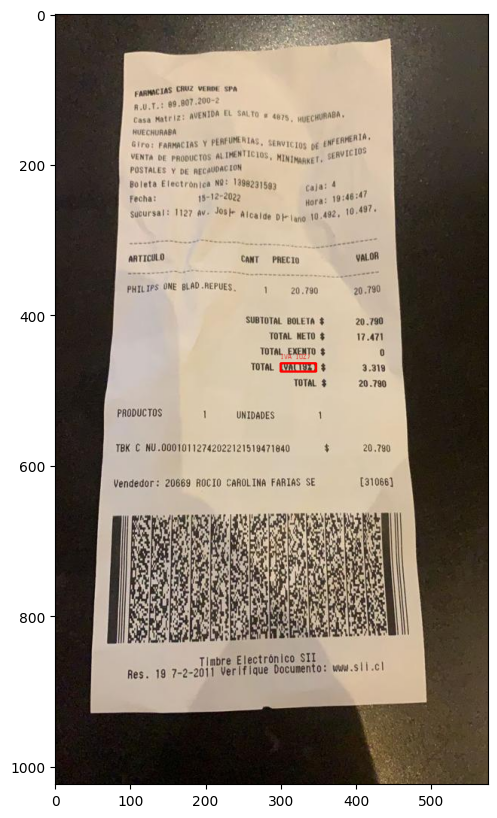

In [69]:
term_search = 'IVA'

os.makedirs('processed_images', exist_ok = True)

for image in paths:
  img = cv2.imread(image)
  img_original = img.copy()
  file_image = os.path.split(image)[-1]
  img, number_of_times = ocr_process_image(img, term_search, min_conf)
  if number_of_times > 0:
    show_img(img)
    new_file_image = 'processed_' + file_image
    new_image = './processed_images/' + str(new_file_image)
    cv2.imwrite(new_image, img)